# Univariate Time Series Forecasting using ARIMA Model

## Problem Statement

*   To Forecast Electricity Production for next 12 Months




In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [2]:
#load data
df=pd.read_csv("/content/Electric_Production.csv",)

In [3]:
#renaming the columns
df.columns=["date", "production"]
df

,date,production
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [4]:
# chech first few rows of dataset
df.head()

,date,production
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
# chech last few rows of dataset
df.tail()

,date,production
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212
396,01-01-2018,129.4048


In [6]:
# get quick overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        397 non-null    object 
 1   production  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [7]:
# converting date column from object to date datatype
df["date"]=pd.to_datetime(df["date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        397 non-null    datetime64[ns]
 1   production  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [9]:
# setting date column as index
df.set_index("date" , inplace=True)

In [10]:
# check number of rows and columns
df.shape

(397, 1)

# **Checking stationarity of given series**  


Mean and Variance should be constant over time.No seasonlality should be present

In [11]:
# import adfuller function from statsmodels library
from statsmodels.tsa.stattools import adfuller

# function to test stationarity of given series
def check_stationarity(series):
  result = adfuller(series)
  test_statistic,p_value=result[0] , result[1]
  print('ADF Test Statistic:',test_statistic)
  print('p-value:' , p_value)
  if p_value<0.05:
    print("p-value is less then 0.05 hence given series is stationary")
  else:
    print("p-value is more than or equal to 0.05 hance give series is not stationary")


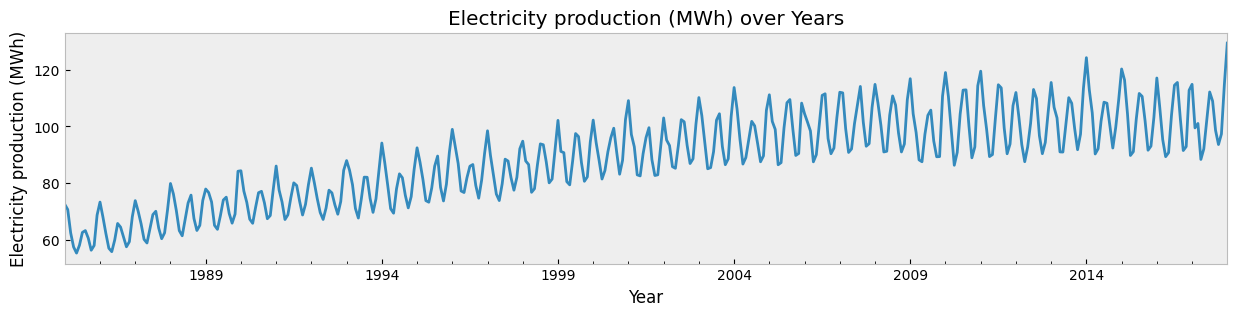

ADF Test Statistic: -2.256990350047225
p-value: 0.1862146911658744
p-value is more than or equal to 0.05 hance give series is not stationary


In [12]:
# plotting the electricity production trend over years
plt.figure(figsize=(15,3))
df['production'].plot()
plt.title("Electricity production (MWh) over Years")
plt.xlabel("Year")
plt.ylabel("Electricity production (MWh)")
plt.grid(False)
plt.show()

#cheking if given series is stationary using ADF Test
check_stationarity(df['production'])

There is Upward trend present.No Seasonality present (ARIMA model can be used)

# How to make series stationary?

**Use differencing technique**

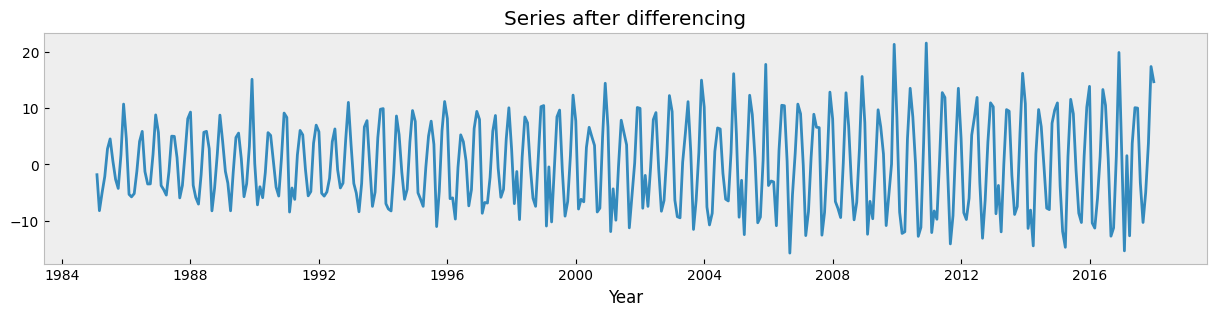

ADF Test Statistic: -7.104890882267313
p-value: 4.0777865655394095e-10
p-value is less then 0.05 hence given series is stationary


In [13]:
# taking 1st level of differencing
df1 = df.diff()
df1.dropna(inplace=True)

# plotting the electricity production trend over years
plt.figure(figsize=(15,3))
plt.plot(df1["production"])
plt.title("Series after differencing")
plt.xlabel('Year')
plt.grid(False)
plt.show()

# cheking if series is stationary after 1st level of differencing
check_stationarity(df1["production"])

# ***Univariate Time Series Model(ARIMA)***

## Once series is stationary , Find optimal values of p,d,q

*   p - Autoregressive terms
*   d - Nuber of time differencing technique is used to make series stationary
*   q - Moving average terms



















To find values of p and q will make use of auto_arima function from statsmodels library

In [14]:
# Step 1: Uninstall conflicting packages
#!pip uninstall -y numpy pmdarima numba tensorflow

# Step 2: Install compatible versions
#!pip install numpy==1.24.2
#!pip install numba==0.57.1
#!pip install tensorflow==2.13.0
#!pip install pmdarima --no-cache-dir

In [15]:
# import auto_arima function from pmdarima library
from pmdarima import auto_arima


# passing non stationary data to auto_arima function
auto_model = auto_arima(df["production"],seasonal=False,trace=True,error_action="ignore",suppress_warnings=True,stepwise=True)

# chech summary provided by auto_arima function
auto_model.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2104.191, Time=3.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=1.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2235.015, Time=0.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2219.925, Time=0.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2102.796, Time=0.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2504.075, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2250.070, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2097.464, Time=1.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2229.093, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=2090.294, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2214.542, Time=0.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=inf, Time=3.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=inf, Time=1.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=2105.363, Time=1.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2215.411, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=inf, Time=1.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2100.197, Time=1.16 sec

Best model:  ARIMA(4,1,2)(0,0,0)[0]          
Total fit time: 25.100 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -1038.147
Date:                Wed, 16 Jul 2025   AIC                           2090.294
Time:                        04:55:06   BIC                           2118.164
Sample:                    01-01-1985   HQIC                          2101.336
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7712      0.049     15.874      0.000       0.676       0.866
ar.L2         -0.9713      0.056    -17.393      0.000      -1.081      -0.862
ar.L3         -0.0287      0.056     -0.513      0.608      -0.138       0.081
ar.L4         -0.1994      0.051     -3.894      0.000      -0.300      -0.099
ma.L1         -0.9699      0.033    -29.159      0.000      -1.035      -0.905
ma.L2          0.9437      0.023     41.583      0.000       0.899       0.988
sigma2        10.8863      0.740     14.705      0.000       9.435      12.337
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# check optimal combination values of p,d,q
print("Best Order (p,d,q):",auto_model.order)

Best Order (p,d,q): (4, 1, 2)


# ARIMA - AutoRegressive Integrated Moving Average

In [17]:
# import ARIMA class from statsmodels library
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model using best combinations of p,d,q obtained from auto_arima
Model = ARIMA(df['production'],order=auto_model.order)

# build the ARIMA model
Model_fit=Model.fit()

Model_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  397
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -1038.147
Date:                Wed, 16 Jul 2025   AIC                           2090.294
Time:                        05:08:40   BIC                           2118.164
Sample:                    01-01-1985   HQIC                          2101.336
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7712      0.049     15.874      0.000       0.676       0.866
ar.L2         -0.9713      0.056    -17.393      0.000      -1.081      -0.862
ar.L3         -0.0287      0.056     -0.513      0.608      -0.138       0.081
ar.L4         -0.1994      0.051     -3.894      0.000      -0.300      -0.099
ma.L1         -0.9699      0.033    -29.159      0.000      -1.035      -0.905
ma.L2          0.9437      0.023     41.583      0.000       0.899       0.988
sigma2        10.8863      0.740     14.705      0.000       9.435      12.337
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# forecasting the next 12 months
n_forecast = 12

# predict function will return series with predicted values
pred_values = Model_fit.predict(start=len(df), end=len(df) + n_forecast - 1)

# renaming series for clarity
pred_values.rename("production",inplace=True)


,production
2018-02-01,123.426483
2018-03-01,110.701225
2018-04-01,102.807267
2018-05-01,106.323146
2018-06-01,118.258636
2018-07-01,126.811561
2018-08-01,123.287638
2018-09-01,111.219534
2018-10-01,102.710757
2018-11-01,106.266363


In [20]:
# store forecasted electricity production values in dataframe
result_df = pred_values.rename("predicted_production")


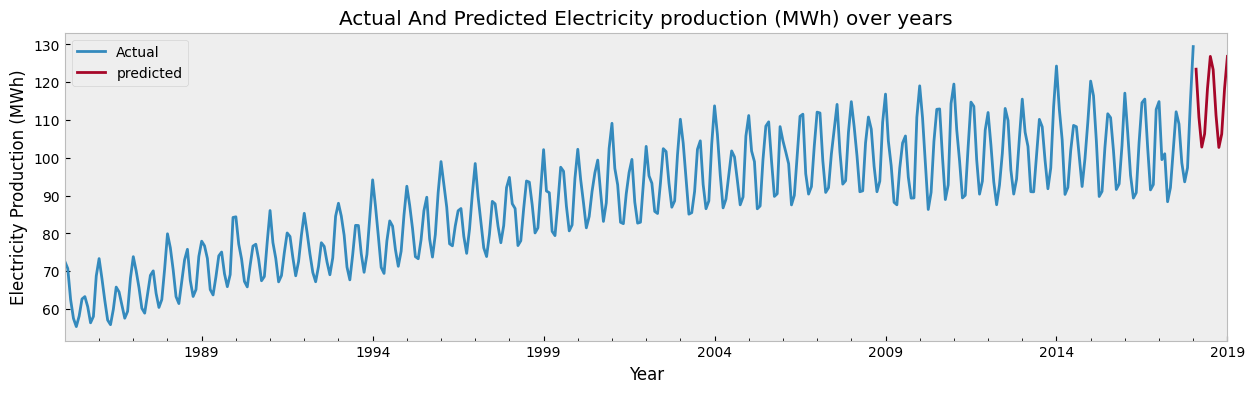

In [22]:
# plotting actual and predicted electricity production (MWh) over years
plt.figure(figsize=(15,4))
df["production"].plot(legend=True,label="Actual")
result_df.plot(legend=True,label="predicted")
plt.title("Actual And Predicted Electricity production (MWh) over years")
plt.xlabel("Year")
plt.ylabel("Electricity Production (MWh)")
plt.grid(False)
plt.show()